## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 152us/step - loss: 2.2615 - acc: 0.1612 - val_loss: 2.2097 - val_acc: 0.2012
Epoch 2/500
50000/50000 [==============================] - 7s 143us/step - loss: 2.1767 - acc: 0.2320 - val_loss: 2.1473 - val_acc: 0.2445
Epoch 3/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.1210 - acc: 0.2557 - val_loss: 2.0965 - val_acc: 0.2636
Epoch 4/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.0746 - acc: 0.2736 - val_loss: 2.0540 - val_acc: 0.2790
Epoch 5/500
50000/50000 [==============================] - 7s 142us/step - loss: 2.0359 - acc: 0.2868 - val_loss: 2.0188 - val_acc: 0.2965
Epoch 6/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.0028 - acc: 0.2982 - val_loss: 1.9896 - val_acc: 0.3017
Epoch 7/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.9754 - acc: 0.3065 - val_loss: 1.

50000/50000 [==============================] - 7s 145us/step - loss: 1.6337 - acc: 0.4350 - val_loss: 1.6453 - val_acc: 0.4232
Epoch 60/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.6305 - acc: 0.4353 - val_loss: 1.6398 - val_acc: 0.4245
Epoch 61/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6278 - acc: 0.4357 - val_loss: 1.6364 - val_acc: 0.4253
Epoch 62/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6249 - acc: 0.4369 - val_loss: 1.6338 - val_acc: 0.4273
Epoch 63/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.6217 - acc: 0.4371 - val_loss: 1.6303 - val_acc: 0.4303
Epoch 64/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.6190 - acc: 0.4397 - val_loss: 1.6281 - val_acc: 0.4333
Epoch 65/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6161 - acc: 0.4386 - val_loss: 1.6254 - val_acc: 0.4306
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 137us/step - loss: 1.4997 - acc: 0.4786 - val_loss: 1.5244 - val_acc: 0.4628
Epoch 118/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.4982 - acc: 0.4794 - val_loss: 1.5244 - val_acc: 0.4626
Epoch 119/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.4958 - acc: 0.4793 - val_loss: 1.5240 - val_acc: 0.4640
Epoch 120/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.4943 - acc: 0.4808 - val_loss: 1.5269 - val_acc: 0.4616
Epoch 121/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.4925 - acc: 0.4805 - val_loss: 1.5204 - val_acc: 0.4648
Epoch 122/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.4906 - acc: 0.4809 - val_loss: 1.5184 - val_acc: 0.4651
Epoch 123/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.4889 - acc: 0.4814 - val_loss: 1.5176 - val_acc: 0.4660
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 1.4047 - acc: 0.5106 - val_loss: 1.4565 - val_acc: 0.4851
Epoch 176/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4037 - acc: 0.5115 - val_loss: 1.4625 - val_acc: 0.4817
Epoch 177/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4020 - acc: 0.5102 - val_loss: 1.4581 - val_acc: 0.4860
Epoch 178/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4007 - acc: 0.5119 - val_loss: 1.4542 - val_acc: 0.4832
Epoch 179/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.3992 - acc: 0.5125 - val_loss: 1.4637 - val_acc: 0.4839
Epoch 180/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3976 - acc: 0.5129 - val_loss: 1.4556 - val_acc: 0.4823
Epoch 181/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3963 - acc: 0.5139 - val_loss: 1.4505 - val_acc: 0.4882
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 139us/step - loss: 1.3266 - acc: 0.5392 - val_loss: 1.4147 - val_acc: 0.4967
Epoch 234/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3249 - acc: 0.5388 - val_loss: 1.4187 - val_acc: 0.4943
Epoch 235/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.3244 - acc: 0.5390 - val_loss: 1.4061 - val_acc: 0.5016
Epoch 236/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3229 - acc: 0.5398 - val_loss: 1.4130 - val_acc: 0.4978
Epoch 237/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3220 - acc: 0.5403 - val_loss: 1.4065 - val_acc: 0.5015
Epoch 238/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3211 - acc: 0.5405 - val_loss: 1.4140 - val_acc: 0.4958
Epoch 239/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3195 - acc: 0.5399 - val_loss: 1.4093 - val_acc: 0.5013
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 11s 213us/step - loss: 1.2590 - acc: 0.5610 - val_loss: 1.3806 - val_acc: 0.5099
Epoch 292/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.2572 - acc: 0.5624 - val_loss: 1.3971 - val_acc: 0.5041
Epoch 293/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.2557 - acc: 0.5630 - val_loss: 1.3791 - val_acc: 0.5101
Epoch 294/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.2553 - acc: 0.5632 - val_loss: 1.3847 - val_acc: 0.5088
Epoch 295/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.2536 - acc: 0.5640 - val_loss: 1.4057 - val_acc: 0.4944
Epoch 296/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.2532 - acc: 0.5633 - val_loss: 1.3734 - val_acc: 0.5140
Epoch 297/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.2515 - acc: 0.5628 - val_loss: 1.3713 - val_acc: 0.5114
Epoch 298/500
50000/

50000/50000 [==============================] - 11s 212us/step - loss: 1.1938 - acc: 0.5842 - val_loss: 1.3579 - val_acc: 0.5176
Epoch 350/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.1935 - acc: 0.5838 - val_loss: 1.3658 - val_acc: 0.5119
Epoch 351/500
50000/50000 [==============================] - 11s 210us/step - loss: 1.1921 - acc: 0.5844 - val_loss: 1.3518 - val_acc: 0.5215
Epoch 352/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.1902 - acc: 0.5861 - val_loss: 1.3549 - val_acc: 0.5179
Epoch 353/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1898 - acc: 0.5853 - val_loss: 1.3675 - val_acc: 0.5130
Epoch 354/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.1879 - acc: 0.5859 - val_loss: 1.3920 - val_acc: 0.5072
Epoch 355/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.1877 - acc: 0.5875 - val_loss: 1.3617 - val_acc: 0.5135
Epoch 356/500
50000/

50000/50000 [==============================] - 7s 137us/step - loss: 1.1316 - acc: 0.6080 - val_loss: 1.3353 - val_acc: 0.5275
Epoch 408/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.1307 - acc: 0.6066 - val_loss: 1.3598 - val_acc: 0.5142
Epoch 409/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.1300 - acc: 0.6075 - val_loss: 1.3561 - val_acc: 0.5206
Epoch 410/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1288 - acc: 0.6067 - val_loss: 1.3714 - val_acc: 0.5146
Epoch 411/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1286 - acc: 0.6065 - val_loss: 1.3755 - val_acc: 0.5167
Epoch 412/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.1271 - acc: 0.6081 - val_loss: 1.3435 - val_acc: 0.5268
Epoch 413/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1265 - acc: 0.6091 - val_loss: 1.3399 - val_acc: 0.5265
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 7s 139us/step - loss: 1.0722 - acc: 0.6282 - val_loss: 1.3343 - val_acc: 0.5294
Epoch 466/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0701 - acc: 0.6285 - val_loss: 1.3375 - val_acc: 0.5259
Epoch 467/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0702 - acc: 0.6302 - val_loss: 1.3303 - val_acc: 0.5290
Epoch 468/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0695 - acc: 0.6303 - val_loss: 1.3528 - val_acc: 0.5281
Epoch 469/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0673 - acc: 0.6292 - val_loss: 1.3277 - val_acc: 0.5318
Epoch 470/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.0664 - acc: 0.6306 - val_loss: 1.3383 - val_acc: 0.5308
Epoch 471/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.0662 - acc: 0.6313 - val_loss: 1.3509 - val_acc: 0.5194
Epoch 472/500
50000/50000 [

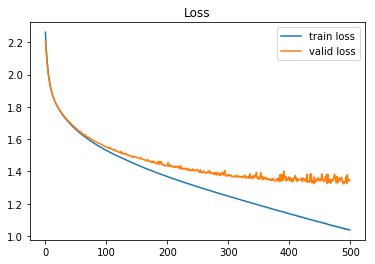

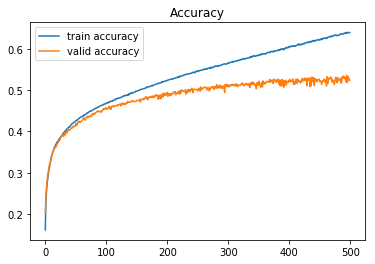

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()